In [1]:
from functions import *

### Plot data from XPS .txt file from Avantage

remember: you need to export ”peak BE", "FWHM", "Area", “Height”, "Atomic %" 

In [2]:

folder = r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0023_Cu\XPS"

sample = "mittma_0023_FL_core"
filename = sample + ".txt"
filename = os.path.join(folder, filename)

grid= measurement_grid(9,9,32,32,-16,-16) 

data,coords = read_XPS(filename, grid)

Coordinate -16.0,16.0                                            \
Data type        Peak Peak BE (eV) Intensity (counts) FWHM (eV)   
0                 C1s      284.688          226.95816     1.531   
1                 C1s      286.165            37.5812       2.4   
2                 O1s      532.758          284.54236     1.541   
3                 O1s        530.4          310.46356     2.123   
4                 P2p      129.137           322.5322     0.742   
5                 P2p      129.998          186.00336     0.906   
6                 S2p      161.718          147.65252     0.942   
7                 S2p      162.785          119.92432     1.506   
8               Cu2p3      933.076         3073.08704     1.424   

Coordinate                                                                    \
Data type  Area (counts*eV) Atomic % C1s Total O1s Total P2p Total S2p Total   
0                 40737.645   14.573    18.324    18.995    11.461     6.572   
1                 10474.406    3.751       NaN       NaN       NaN       NaN   
2                 51401.825    7.613       NaN       NaN       NaN       NaN   
3                 76992.753   11.382       NaN       NaN       NaN       NaN   
4                 27938.683    6.724       NaN       NaN       NaN       NaN   
5                 19673.793    4.737       NaN       NaN       NaN       NaN   
6                 16259.948    2.868       NaN       NaN       NaN       NaN   
7                  20984.81    3.704       NaN       NaN       NaN       NaN   
8               1273658.637   44.646       NaN       NaN       NaN       NaN   

Coordinate  ...   16.0,-16.0                                                \
Data type   ... Peak BE (eV) Intensity (counts) FWHM (eV) Area (counts*eV)   
0           ...      284.658          228.94272     1.567        42084.365   
1           ...      285.883           38.76064     2.481        11132.757   
2           ...       532.78          351.28476     1.558        64142.738   
3           ...        530.3          153.21512     2.328        41476.566   
4           ...      129.138          296.37092     0.739        25583.335   
5           ...      129.983          170.87476     0.886         17663.82   
6           ...      161.791          173.54096     1.065        21634.284   
7           ...      162.932          118.26648     1.312        18138.568   
8           ...      933.096         3056.20196     1.421       1264053.19   

Coordinate                                                               
Data type  Atomic % C1s Total O1s Total P2p Total S2p Total Cu2p3 Total  
0            15.615    19.749    16.213    10.798      7.28       45.96  
1             4.134       NaN       NaN       NaN       NaN         NaN  
2             9.854       NaN       NaN       NaN       NaN         NaN  
3             6.359       NaN       NaN       NaN       NaN         NaN  
4             6.386       NaN       NaN       NaN       NaN         NaN  
5             4.412       NaN       NaN       NaN       NaN         NaN  
6             3.959       NaN       NaN       NaN       NaN         NaN  
7             3.321       NaN       NaN       NaN       NaN         NaN  
8             45.96       NaN       NaN       NaN       NaN         NaN  

[9 rows x 891 columns]

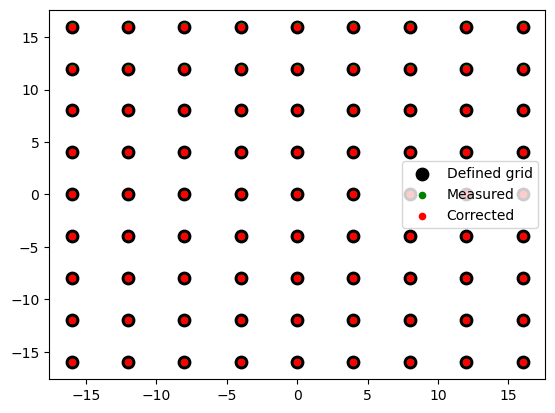

In [3]:
plot_grid(coords, grid)
display(data)

In [4]:
# data.columns.get_level_values(1).unique()
elements_list=[]
el_list=[]
for type in data.columns.get_level_values(1).unique():
    try:
        if type.split(" ")[1]== 'Total':
            element = type.split(" ")[0] 
            elements_list.append(element)
            try:
                # print(element.split()[0][0])
                float(element.split()[0][1]) #if there is a number in position 1 
                el= element.split()[0][0]
                el_list.append(el)
            except:
                el=element.split()[0][0]+ element.split()[0][1]
                el_list.append(el)
    except IndexError:
        pass
print(elements_list)
print(el_list)


['C1s', 'O1s', 'P2p', 'S2p', 'Cu2p3']
['C', 'O', 'P', 'S', 'Cu']


In [7]:
os.makedirs(os.path.join(folder, 'plots'), exist_ok=True) # check if a 'plots' folder exists, if not create it
for i in range(len(elements_list)):
    el = elements_list[i]
    element = el_list[i]
    print(el)
    savepath = os.path.join(folder, 'plots', f'{sample}_{el}.png')
    new_heatmap(datatype= f'{el} Total', data=data, title = f'{sample} {element} atomic %', cbar= f'{element} %',
                 exclude=['4.0,16.0'],  # if you want to exclude some point
                savepath= savepath # if you want to save the plots
                )

C1s


O1s


P2p


S2p


Cu2p3


#### plot other quantities

In [8]:
display(data)

Coordinate -16.0,16.0                                            \
Data type        Peak Peak BE (eV) Intensity (counts) FWHM (eV)   
0                 C1s      284.688          226.95816     1.531   
1                 C1s      286.165            37.5812       2.4   
2                 O1s      532.758          284.54236     1.541   
3                 O1s        530.4          310.46356     2.123   
4                 P2p      129.137           322.5322     0.742   
5                 P2p      129.998          186.00336     0.906   
6                 S2p      161.718          147.65252     0.942   
7                 S2p      162.785          119.92432     1.506   
8               Cu2p3      933.076         3073.08704     1.424   

Coordinate                                                                    \
Data type  Area (counts*eV) Atomic % C1s Total O1s Total P2p Total S2p Total   
0                 40737.645   14.573    18.324    18.995    11.461     6.572   
1                 10474.406    3.751       NaN       NaN       NaN       NaN   
2                 51401.825    7.613       NaN       NaN       NaN       NaN   
3                 76992.753   11.382       NaN       NaN       NaN       NaN   
4                 27938.683    6.724       NaN       NaN       NaN       NaN   
5                 19673.793    4.737       NaN       NaN       NaN       NaN   
6                 16259.948    2.868       NaN       NaN       NaN       NaN   
7                  20984.81    3.704       NaN       NaN       NaN       NaN   
8               1273658.637   44.646       NaN       NaN       NaN       NaN   

Coordinate  ...   16.0,-16.0                                                \
Data type   ... Peak BE (eV) Intensity (counts) FWHM (eV) Area (counts*eV)   
0           ...      284.658          228.94272     1.567        42084.365   
1           ...      285.883           38.76064     2.481        11132.757   
2           ...       532.78          351.28476     1.558        64142.738   
3           ...        530.3          153.21512     2.328        41476.566   
4           ...      129.138          296.37092     0.739        25583.335   
5           ...      129.983          170.87476     0.886         17663.82   
6           ...      161.791          173.54096     1.065        21634.284   
7           ...      162.932          118.26648     1.312        18138.568   
8           ...      933.096         3056.20196     1.421       1264053.19   

Coordinate                                                               
Data type  Atomic % C1s Total O1s Total P2p Total S2p Total Cu2p3 Total  
0            15.615    19.749    16.213    10.798      7.28       45.96  
1             4.134       NaN       NaN       NaN       NaN         NaN  
2             9.854       NaN       NaN       NaN       NaN         NaN  
3             6.359       NaN       NaN       NaN       NaN         NaN  
4             6.386       NaN       NaN       NaN       NaN         NaN  
5             4.412       NaN       NaN       NaN       NaN         NaN  
6             3.959       NaN       NaN       NaN       NaN         NaN  
7             3.321       NaN       NaN       NaN       NaN         NaN  
8             45.96       NaN       NaN       NaN       NaN         NaN  

[9 rows x 891 columns]

In [55]:
datatype = 'Peak'
z = data.iloc[:, data.columns.get_level_values(1) == datatype].dropna().values.flatten()
# print(z)
data.loc[2, data.columns.get_level_values(1) == datatype].values.flatten()[0]

cbar_label= data.loc[index, data.columns.get_level_values(1) == datatype].values.flatten()[0]


'O1s'

In [63]:
for i in range(0,9):
    index=i
    datatype = 'Peak BE (eV)'
    cbar_label= data.loc[index, data.columns.get_level_values(1) == 'Peak'].values.flatten()[0]
    savepath = os.path.join(folder, 'plots', f'{sample}_Peak_pos_{index}.png', dpi=300)
    new_heatmap(datatype= 'Peak BE (eV)', data=data, index= index, title = f'{sample} {cbar_label} {datatype}', cbar= cbar_label, exclude=['4.0,16.0'], 
                savepath= savepath)

